## Compulsory 1

Hemant Thapa

### Importing Libraries

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects  as so
from pandas.io.json import json_normalize
from matplotlib.ticker import FormatStrFormatter
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [408]:
df = pd.read_csv('wine.csv')
df.tail(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1093,1093,US,This moderately aromatic wine conveys Red Hots...,Single Vineyard,87,23.0,Idaho,NaN,NaN,Syrah,3 Horse Ranch Vineyards
1094,1094,US,With aromas and flavors reminiscent of apple s...,NaN,87,24.0,California,Anderson Valley,Mendocino/Lake Counties,Riesling,Balo
1095,1095,US,"Toffee, cinnamon apples and a hefty swirl of s...",NaN,87,16.0,California,Santa Barbara County,Central Coast,Chardonnay,Byron
1096,1096,Italy,"A blend of 60% Vermentino and 40% Viognier, th...",Borgeri,87,24.0,Tuscany,Bolgheri,NaN,White Blend,Giorgio Meletti Cavallari
1097,1097,US,An unidentified mix of Cabernet Sauvignon and ...,Mountain Cuv√©e,87,20.0,California,Sonoma County,Sonoma,Bordeaux-style Red Blend,Gundlach Bundschu
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin
1102,1102,US,Fresh apple aromas and lively citrus flavors m...,The Whip,87,22.0,California,Livermore Valley,Central Coast,White Blend,Murrieta's Well


### Data Cleansing

In [409]:
#Checking columns
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [410]:
#Checking null values
df.isnull().sum()

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

In [411]:
#Checking rows and columns
df.shape

(1103, 11)

In [412]:
df["designation"]=df["designation"].isna().dropna()

In [413]:
df.isnull().sum()

Unnamed: 0       0
country          0
description      0
designation      0
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

In [414]:
df.designation.unique()

array([False,  True])

In [415]:
#NaN values in price
df.price.unique()

array([235., 110.,  90.,  65.,  66.,  73.,  60.,  80.,  48., 185., 325.,
       290.,  75.,  24.,  79., 220.,  45.,  57.,  62., 105.,  15.,  37.,
        nan,  22.,  42., 135.,  29.,  23.,  17.,  26.,  55.,  39.,  69.,
        30.,  50.,  40., 100.,  68.,  28.,  18.,  25.,  36.,  38.,  85.,
        19.,  54.,  59.,  10.,  12.,  13.,  14.,  20., 125.,   7.,  49.,
        93.,  32.,  16.,  21.,  44.,  35.,  61.,  34.,  11.,  58., 120.,
        41., 200.,  43.,   9.,  56.,  46.,  92.,  94.,  27.,  95.,  33.,
        70., 155.,  63., 130., 115.,  31.,  98.,  52.,  64.,  91., 111.,
        88.,  74.,  77.,  87., 113., 140., 500.,  51., 150., 240.,  72.,
       103.,   8.])

In [416]:
#Imputing with Mean price of wine
price_mean = df.price.mean()
df['price'] = df['price'].replace(np.nan, price_mean)
df.price.unique()

array([235.        , 110.        ,  90.        ,  65.        ,
        66.        ,  73.        ,  60.        ,  80.        ,
        48.        , 185.        , 325.        , 290.        ,
        75.        ,  24.        ,  79.        , 220.        ,
        45.        ,  57.        ,  62.        , 105.        ,
        15.        ,  37.        ,  40.24282983,  22.        ,
        42.        , 135.        ,  29.        ,  23.        ,
        17.        ,  26.        ,  55.        ,  39.        ,
        69.        ,  30.        ,  50.        ,  40.        ,
       100.        ,  68.        ,  28.        ,  18.        ,
        25.        ,  36.        ,  38.        ,  85.        ,
        19.        ,  54.        ,  59.        ,  10.        ,
        12.        ,  13.        ,  14.        ,  20.        ,
       125.        ,   7.        ,  49.        ,  93.        ,
        32.        ,  16.        ,  21.        ,  44.        ,
        35.        ,  61.        ,  34.        ,  11.  

In [417]:
df = df.drop(["Unnamed: 0","region_1", "region_2"], axis=1)
df

,country,description,designation,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,False,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",False,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,False,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",False,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",False,95,66.0,Provence,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...
1098,US,Subdued is a good way to describe this light-b...,True,87,12.0,California,White Blend,Kitchen Sink
1099,US,"While spry and dry in style, fragrant apricot ...",False,87,20.0,New York,Riesling,Heron Hill
1100,US,Coming from the cool 2011 vintage this wine of...,False,87,28.0,Washington,Merlot,Chateau Ste. Michelle
1101,France,"This concentrated, structured wine has an eart...",True,87,27.0,Bordeaux,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [418]:
#No more NaN values in dataset
df.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
variety        0
winery         0
dtype: int64

In [419]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'variety', 'winery'],
      dtype='object')

In [420]:
df.tail(2)

,country,description,designation,points,price,province,variety,winery
1101,France,"This concentrated, structured wine has an eart...",True,87,27.0,Bordeaux,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin
1102,US,Fresh apple aromas and lively citrus flavors m...,False,87,22.0,California,White Blend,Murrieta's Well


### Data Visualisation 

#### 1. Country with highest wine count

In [421]:
#Checking mean, count and max
df.describe()

,points,price
count,1103.000000,1103.000000
mean,89.701723,40.242830
std,2.390405,31.734154
min,85.000000,7.000000
25%,88.000000,22.000000
50%,90.000000,34.000000
75%,91.000000,49.000000
max,96.000000,500.000000


In [422]:
#List of countries
country = df.country.value_counts()
country

US              504
France          172
Italy           163
Portugal         70
Spain            64
Germany          27
Argentina        25
Chile            21
South Africa     10
Greece            8
Israel            8
Australia         6
Bulgaria          5
Canada            5
Austria           4
Romania           2
New Zealand       2
Hungary           2
Croatia           2
Morocco           1
Moldova           1
Slovenia          1
Name: country, dtype: int64

In [423]:
country_index = df.country.value_counts().index
country_index

Index(['US', 'France', 'Italy', 'Portugal', 'Spain', 'Germany', 'Argentina',
       'Chile', 'South Africa', 'Greece', 'Israel', 'Australia', 'Bulgaria',
       'Canada', 'Austria', 'Romania', 'New Zealand', 'Hungary', 'Croatia',
       'Morocco', 'Moldova', 'Slovenia'],
      dtype='object')

In [424]:
#List of countries
country_values = df.country.value_counts().values
country_values

array([504, 172, 163,  70,  64,  27,  25,  21,  10,   8,   8,   6,   5,
         5,   4,   2,   2,   2,   2,   1,   1,   1])

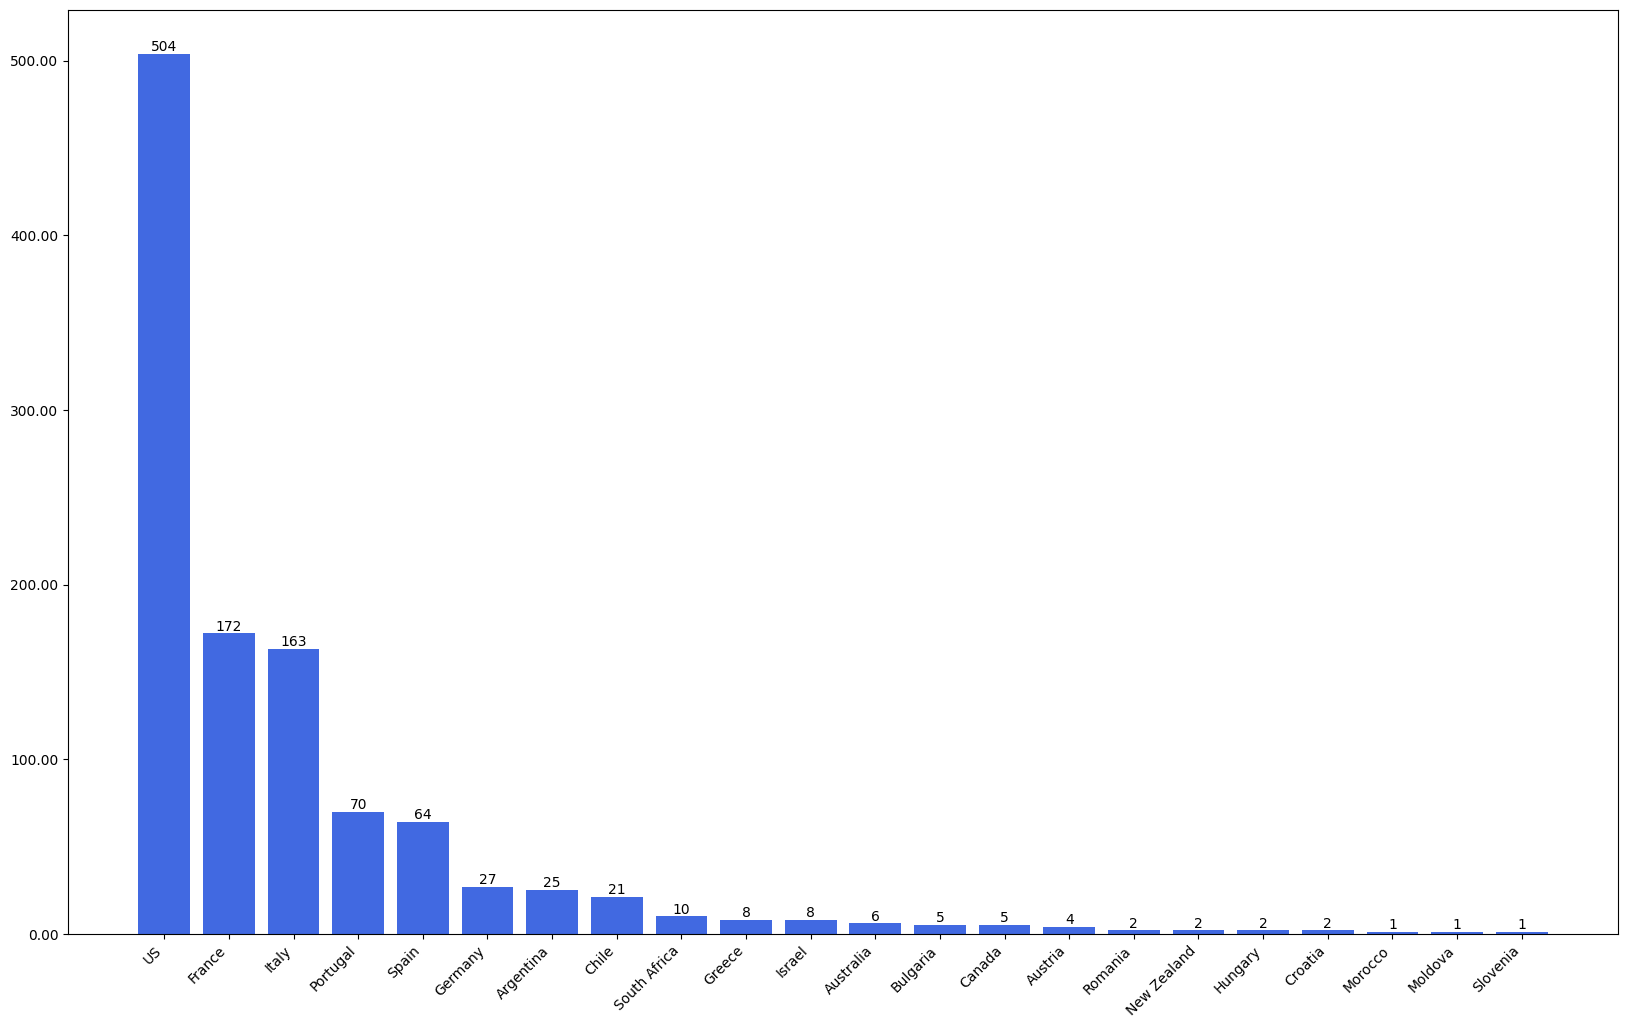

In [425]:
plt.figure(figsize=(20,12))
plt.bar(country_index, country_values, color='royalblue')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
for i in range(len(df['country'].value_counts())):
    count = df['country'].value_counts()[i]
    plt.annotate(str(count), (i, count), ha='center', va='bottom')
plt.show()
plt.show()

1. U.S has most wine count in dataset, which are around 504
2. France has second most wine count in datset, which are around 172
3. Slovenia, Morocco and Moldova has least wine count in dataset with 1

#### 2. Country with highest point count

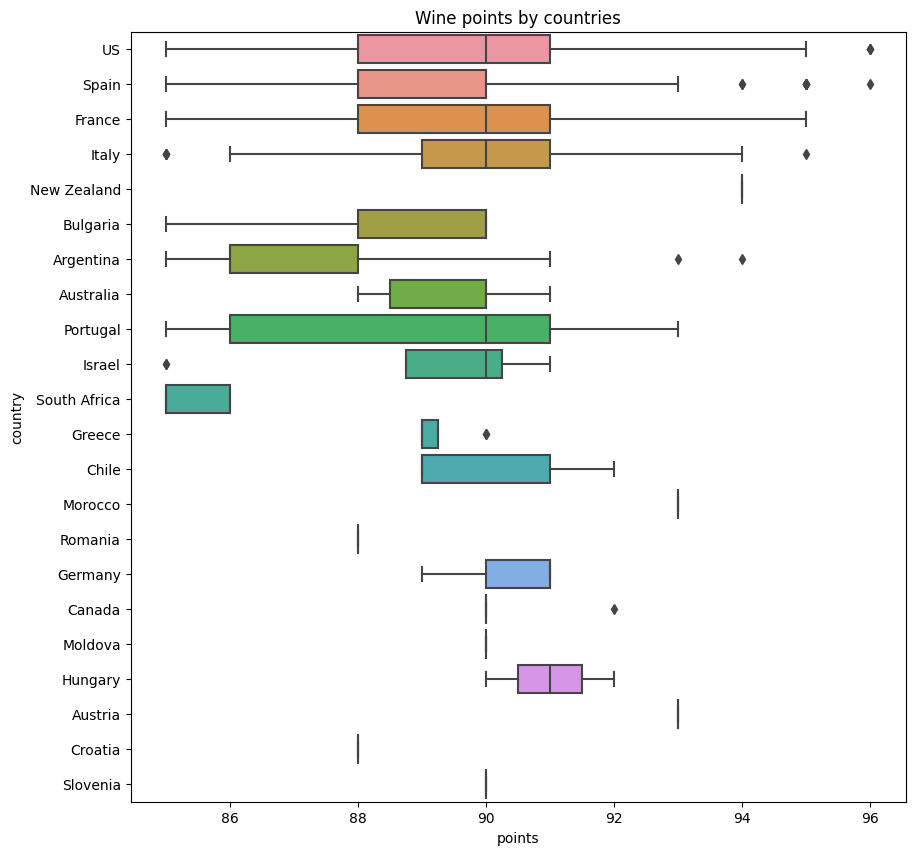

In [426]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="points",y="country")
plt.title("Wine points by countries")
plt.xlabel("points")
plt.ylabel("country")
plt.show()

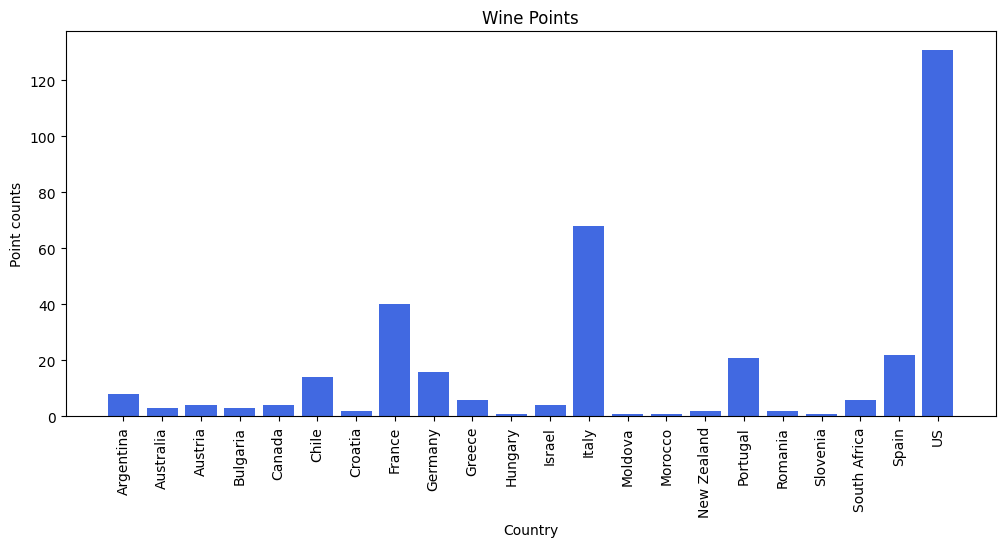

In [427]:
# Group the data by country and variety
grouped = df.groupby(["country", "points"]).size().reset_index(name="counts")
plt.figure(figsize=(12,5))
# Plot the data using a bar chart
plt.bar(grouped["country"], grouped["counts"], color='royalblue')
plt.xlabel("Country")
plt.ylabel("Point counts")
plt.title('Wine Points')
plt.xticks(rotation=90)
plt.show()

1. U.S has highest wine points on datset, it is becuase of most wine count in dataset is U.S
2. Italy has second highest points on dataset
3. France has third highest points on dataset

In [428]:
df.points.unique()

array([96, 95, 94, 90, 91, 86, 89, 88, 87, 93, 92, 85])

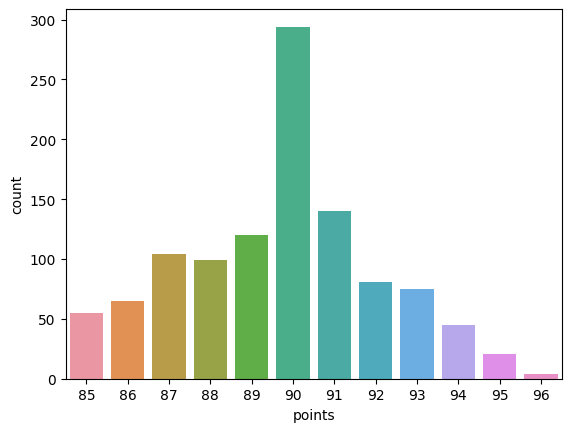

In [429]:
sns.countplot(df, x='points')
plt.show()

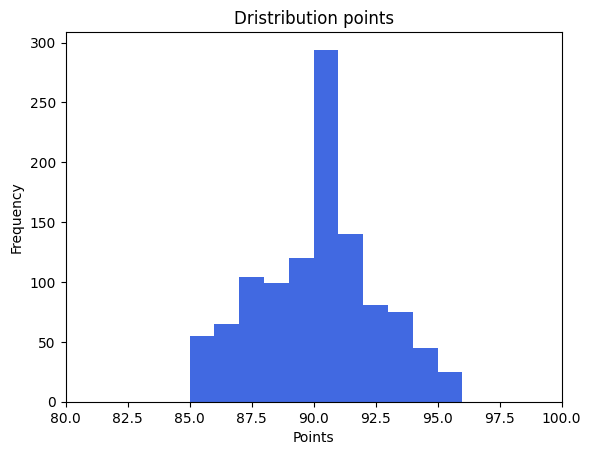

In [430]:
plt.hist(data=df, x='points', bins=np.arange (80, df['points'].max()+1, 1), color='royalblue')
plt.xlim(80,100)
plt.title('Dristribution points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

1. 90 is the highest point count in wine 
2. 91 is second highest point count in wine
3. 89 is third highest point count in wine

In [431]:
df.price.unique()

array([235.        , 110.        ,  90.        ,  65.        ,
        66.        ,  73.        ,  60.        ,  80.        ,
        48.        , 185.        , 325.        , 290.        ,
        75.        ,  24.        ,  79.        , 220.        ,
        45.        ,  57.        ,  62.        , 105.        ,
        15.        ,  37.        ,  40.24282983,  22.        ,
        42.        , 135.        ,  29.        ,  23.        ,
        17.        ,  26.        ,  55.        ,  39.        ,
        69.        ,  30.        ,  50.        ,  40.        ,
       100.        ,  68.        ,  28.        ,  18.        ,
        25.        ,  36.        ,  38.        ,  85.        ,
        19.        ,  54.        ,  59.        ,  10.        ,
        12.        ,  13.        ,  14.        ,  20.        ,
       125.        ,   7.        ,  49.        ,  93.        ,
        32.        ,  16.        ,  21.        ,  44.        ,
        35.        ,  61.        ,  34.        ,  11.  

#### 3. Price Analysis

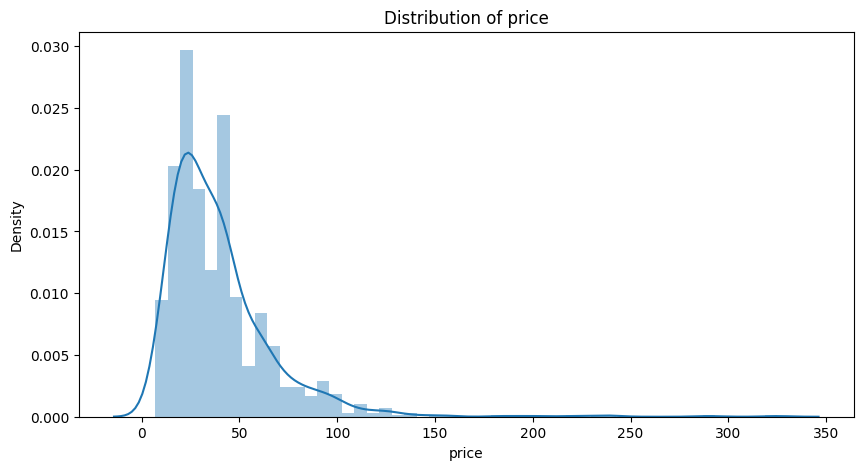

In [432]:
#the higher amount of wines cost less than 500
prices = df.price.unique().tolist()
plt.figure(figsize = (10,5))
plt.title('Distribution of price')
sns.distplot(df[df['price']<500]['price'])
plt.show()

#### Calcualting mean price of each country

In [433]:
# Group the data by the "country" column and aggregate the prices using the mean function
price_grouped = df.groupby("country")["price"].mean()

print(price_grouped)

country
Argentina       21.360000
Australia       42.166667
Austria         26.310707
Bulgaria        17.600000
Canada          33.600000
Chile           35.714286
Croatia         23.000000
France          36.231391
Germany         27.777778
Greece          18.750000
Hungary         25.500000
Israel          31.875000
Italy           53.876421
Moldova         32.000000
Morocco         35.000000
New Zealand     57.000000
Portugal        26.631631
Romania          9.000000
Slovenia        40.000000
South Africa    17.900000
Spain           37.788838
US              42.704847
Name: price, dtype: float64


In [434]:
price_grouped_index = price_grouped.index
price_grouped_index

Index(['Argentina', 'Australia', 'Austria', 'Bulgaria', 'Canada', 'Chile',
       'Croatia', 'France', 'Germany', 'Greece', 'Hungary', 'Israel', 'Italy',
       'Moldova', 'Morocco', 'New Zealand', 'Portugal', 'Romania', 'Slovenia',
       'South Africa', 'Spain', 'US'],
      dtype='object', name='country')

In [435]:
price_grouped_values = price_grouped
price_grouped_values

country
Argentina       21.360000
Australia       42.166667
Austria         26.310707
Bulgaria        17.600000
Canada          33.600000
Chile           35.714286
Croatia         23.000000
France          36.231391
Germany         27.777778
Greece          18.750000
Hungary         25.500000
Israel          31.875000
Italy           53.876421
Moldova         32.000000
Morocco         35.000000
New Zealand     57.000000
Portugal        26.631631
Romania          9.000000
Slovenia        40.000000
South Africa    17.900000
Spain           37.788838
US              42.704847
Name: price, dtype: float64

In [436]:
price_dataset = {'country_key':price_grouped_index, 'price_value':price_grouped_values}
price_df = pd.DataFrame(price_dataset)
price_df

,country_key,price_value
country,,
Argentina,Argentina,21.360000
Australia,Australia,42.166667
Austria,Austria,26.310707
Bulgaria,Bulgaria,17.600000
Canada,Canada,33.600000
Chile,Chile,35.714286
Croatia,Croatia,23.000000
France,France,36.231391
Germany,Germany,27.777778


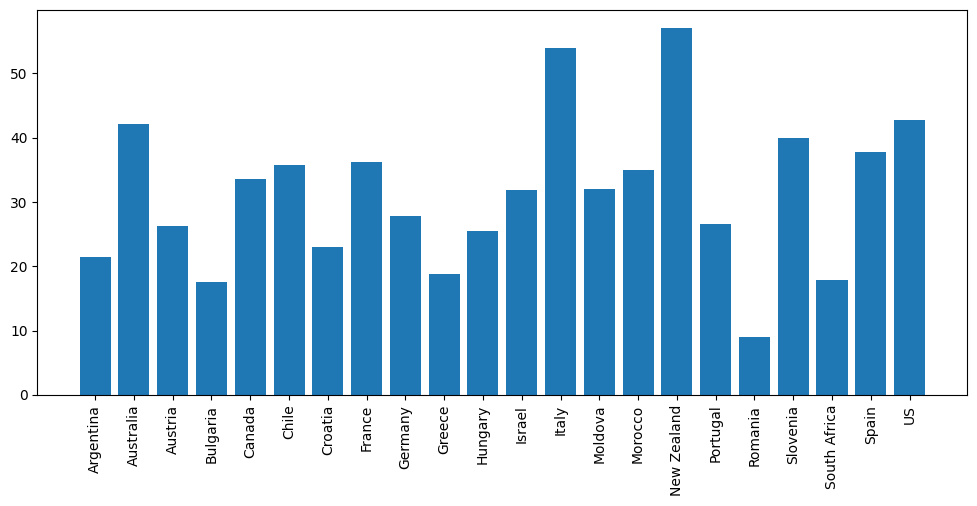

In [437]:
plt.figure(figsize=(12,5))
plt.bar(price_df.country_key, price_df.price_value)
plt.xticks(rotation=90)
plt.show()

1. New Zealand, Italy and Australia has the highest price of wine 
2. Romania has lowest price of wine

In [438]:
price_df['price_value'].mean()

31.44488933520021

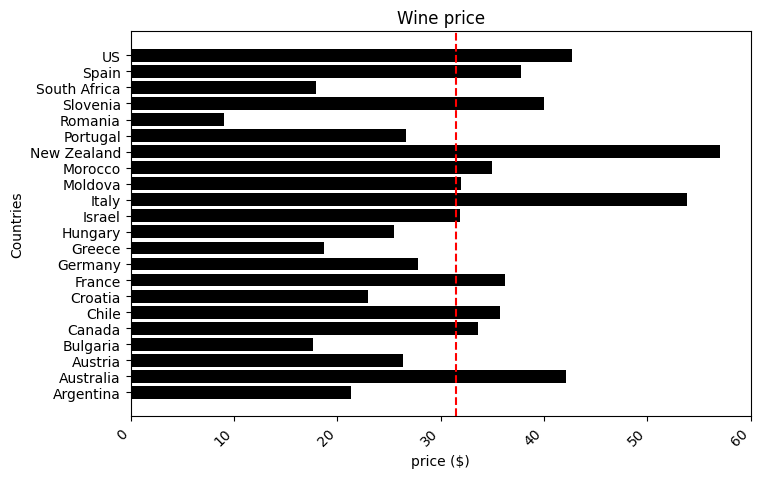

In [439]:
group_data_price = price_df.price_value
group_names_price = price_df.country_key
group_mean_price = np.mean(group_data_price)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(group_names_price, group_data_price, color='black')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean_price, ls='--', color='red')
# Now we move our title up since it's getting a little cramped
ax.title.set(y=1)
ax.set(xlim=[0, 60], xlabel='price ($)', ylabel='Countries',
       title='Wine price')
plt.show()

If we calulate mean price of overall country, it shows that country like Romaina, Hungary, France, Austria, Argentina, Bulgaria, Croatia, Germany, Greece, Portugal, and South Africa comes under mean price value.

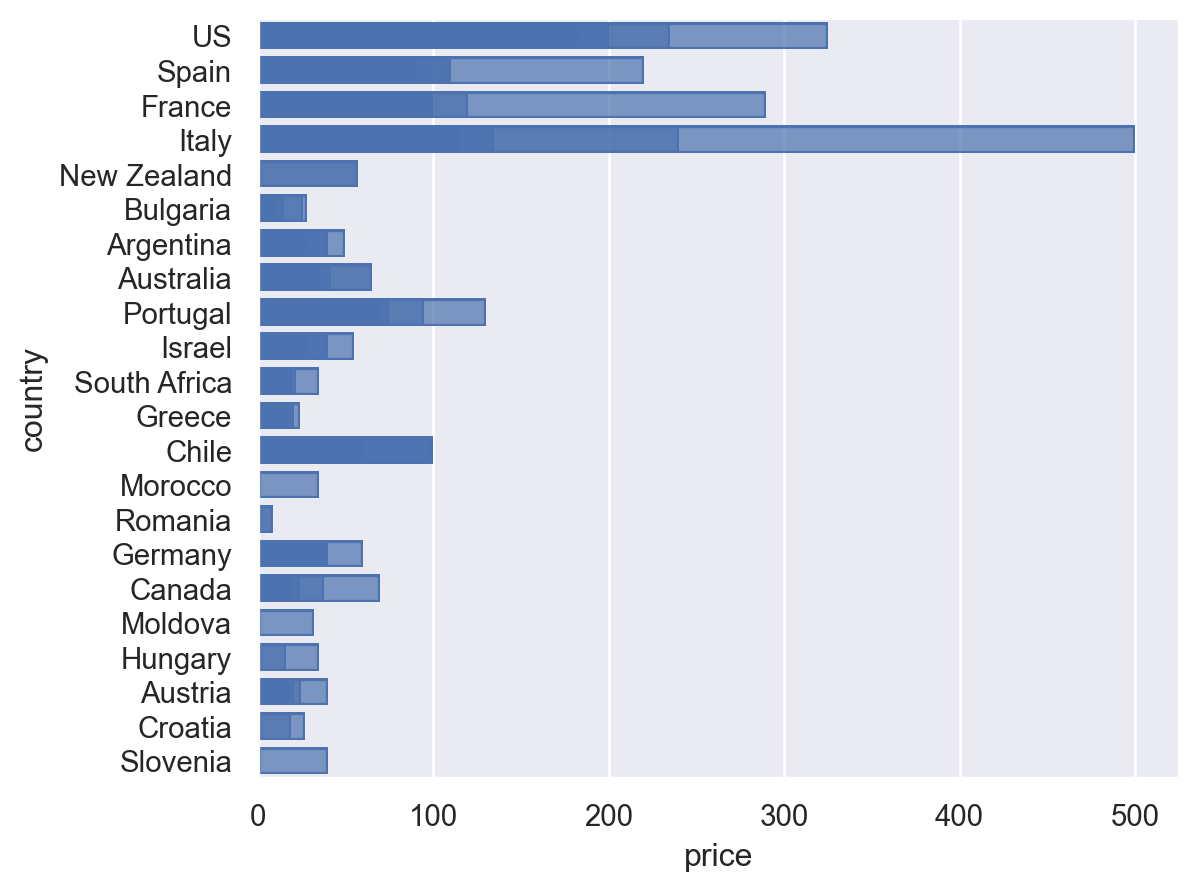

In [440]:
so.Plot(df["price"],df["country"]).add(so.Bar())

In [441]:
group_data = df.price
group_names = df.country
group_mean = np.mean(group_data)

Average price of wine: $40.24


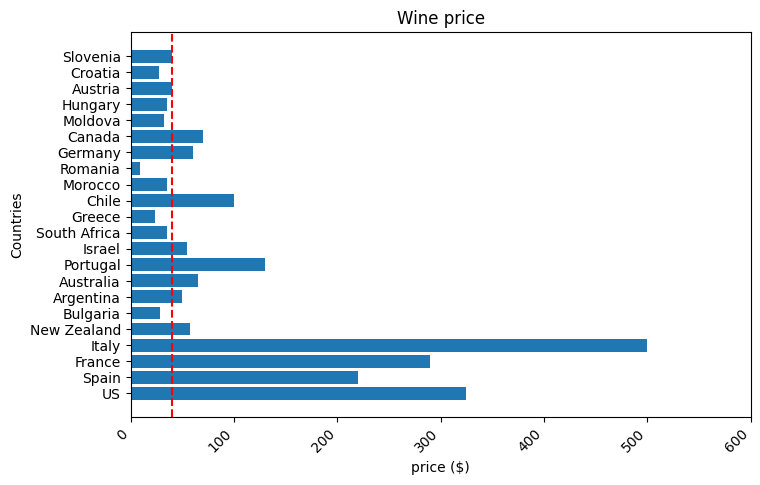

In [442]:
print(f'Average price of wine: ${round(df.price.mean(),2)}')
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='red')
# Now we move our title up since it's getting a little cramped
ax.title.set(y=1)
ax.set(xlim=[0, 600], xlabel='price ($)', ylabel='Countries',
       title='Wine price')
plt.show()

In [457]:
price_unique = df.price.unique()
sorted_array = sorted(price_unique)
print(sorted_array)

[7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 40.24282982791587, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 68.0, 69.0, 70.0, 72.0, 73.0, 74.0, 75.0, 77.0, 79.0, 80.0, 85.0, 87.0, 88.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 98.0, 100.0, 103.0, 105.0, 110.0, 111.0, 113.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 150.0, 155.0, 185.0, 200.0, 220.0, 235.0, 240.0, 290.0, 325.0, 500.0]


1. Highest price of wine is in Italy, which is 500
2. lowest price of wine is in Romania, which is 7

#### 4. Varieties of wines

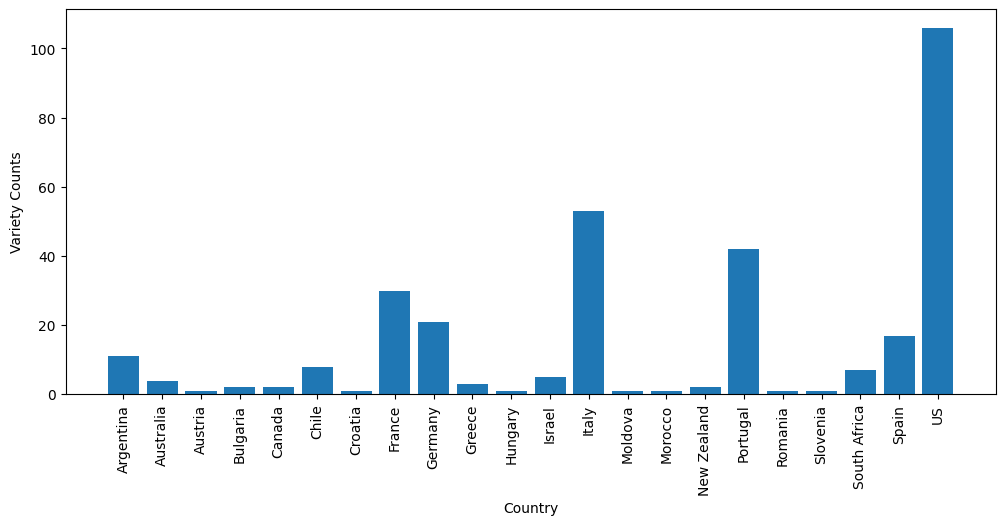

In [142]:
# Group the data by country and variety
grouped = df.groupby(["country", "variety"]).size().reset_index(name="counts")
plt.figure(figsize=(12,5))
# Plot the data using a bar chart
plt.bar(grouped["country"], grouped["counts"])
plt.xlabel("Country")
plt.ylabel("Variety Counts")
plt.xticks(rotation=90)
plt.show()

1. U.S is the first country to have highest varieties of wine
2. Italy is the second country to have highest varieties of wine in list
3. Portugal is the third highest country to have varieties of wine in listy

#### 5. Country according to wine points and price

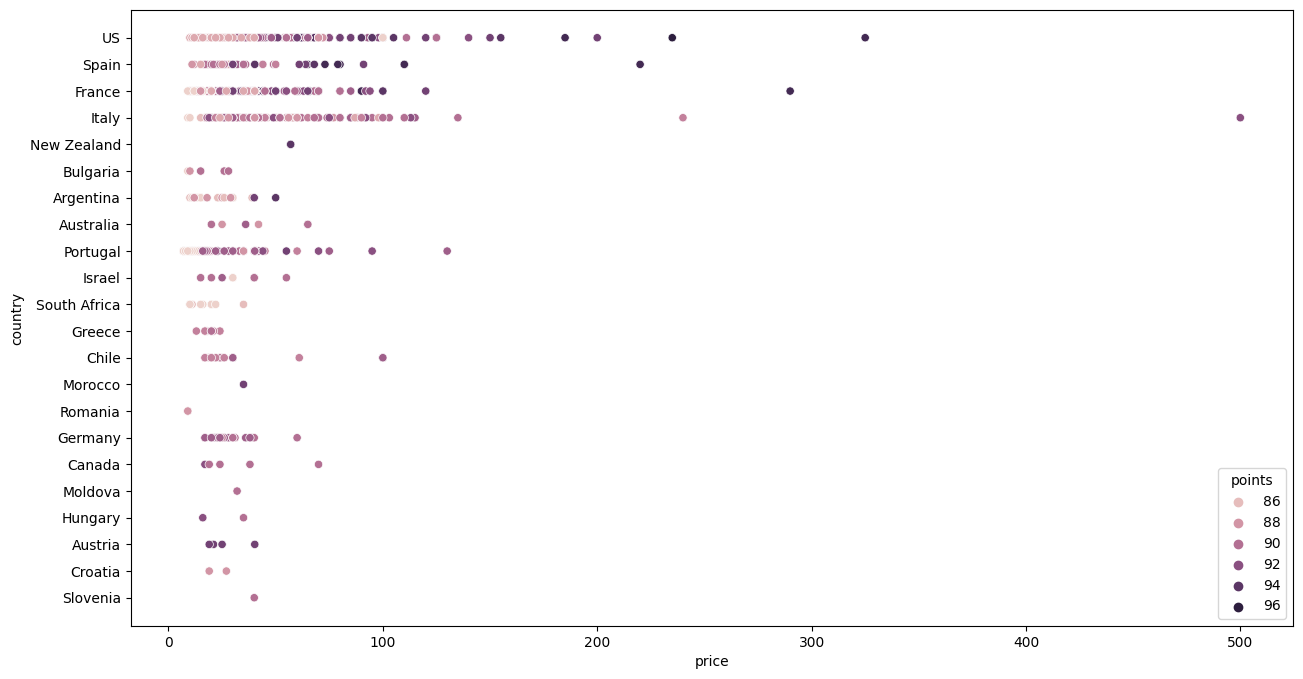

In [469]:
plt.figure(figsize=(15,8))
scat_1=sns.scatterplot(data=df, y='country', x='price', hue='points')

In [476]:
wine_points = df.points
wine_points.describe()

count    1103.000000
mean       89.701723
std         2.390405
min        85.000000
25%        88.000000
50%        90.000000
75%        91.000000
max        96.000000
Name: points, dtype: float64

1. U.S has the highest count on point on wines
2. Romanina has the lowest count on point on wines

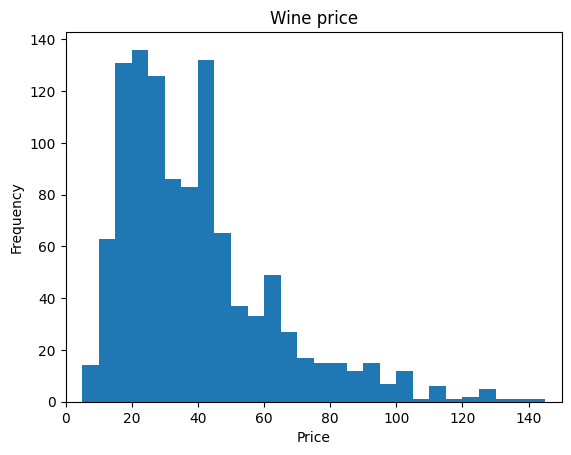

In [233]:
bins = np.arange(0,df["price"].max()+5,5)
plt.hist(data=df,x="price",bins=bins)
plt.xlim(0,150)
plt.title("Wine price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Most selling price of wine is in range between 20 to 25 dollars.